# Getting Started with Data Science (using Python)

![Image of a parody data science book. Text: "I can't tell if the computer is freezing or working"](https://datasciencedojo.com/wp-content/uploads/2016/04/generate.png)


## What is data science exactly?
## What goes into a data science project?
## The ethical considerations that should be part of a data science project
## How we can use code to get started on a project
- How to acquire data
- How to clean data
- How to understand the data you've just acquired and cleaned
- How to gain basic insights into that data

![](https://image.slidesharecdn.com/jsm2016-160804155728/95/data-science-as-a-science-32-638.jpg?cb=1470326843)

#### Identifying the problem:


- Is there a problem?
- Does the problem need machine learning to solve it?

![Google+](files/google+.PNG)

#### Defining the problem:

- What's the context around the problem?
- What research already exists?
- What do subject matter experts say about the problem and potential solutions?

![Data Science Venn diagram](https://static1.squarespace.com/static/57368a3d2fe131630fc0f651/t/5760a4c3b09f957554b0246c/1465951434508/?format=500w)

#### Collecting data:

- Who created the dataset
- How was the data generated
- Is it randomly sampled? Is it representative of the target population?
- Are there any assumptions baked into the data?
- Is there PII involved? Can information be deanonymised with reasonable effort?

_When the dataset isn't as representative as it should be:_
![amazon](files/amazon.PNG)

_And when there's assumptions in the dataset:_
![](http://dcentric.wamu.org/files/2011/05/fooddeserts1.jpg)


Some of my favourite places to get data:
- [Kaggle](https://www.kaggle.com/datasets)
- [DataIsPlural](https://docs.google.com/spreadsheets/d/1wZhPLMCHKJvwOkP4juclhjFgqIY8fQFMemwKL2c64vk/edit)
- [News organizations' GitHubs](https://github.com/fivethirtyeight/data)
- [data.world](https://data.world/open-data-community)
- [Data.gov](https://www.data.gov)
- [Makeover Monday]()
- [FEC data]()

In [1]:
#### Coding time!
from IPython.display import HTML
HTML('<img src="http://www.randomcontrol.com/blog/wp-content/uploads/coding_on_and_on.gif">')

#### Reading in the data

In [2]:
#before we do any coding we'll import several packages that'll make everything we're going to do infinitely easier 
import pandas as pd #pandas is a package designed for data analysis
import numpy as np #numpy is a great package that has a tonne of in-built statistical formulae
import matplotlib.pyplot as plt #matplotlib is a great plotting library
plt.style.use('fivethirtyeight') #this adds a customised style to my plots
% matplotlib inline 
#this makes sure my plots show up when i run each cell
#PRO TIP: '%matplotlib inline is an iPython magic command. You can learn more about what other commands are available here: https://ipython.readthedocs.io/en/stable/interactive/magics.html'

![Pandas](files/pandas.PNG)

https://pandas.pydata.org/pandas-docs/stable/

In [3]:
#we'll start off by loading our dataset using pandas
#pandas makes it incredibly easy to load CSVs, tabular data, json files, etc. 
#pandas can read a file from a local computer, from the repository you're in, or directly from a URL
#in this case we're going to be reading in three files from 538's GitHub (you can find more info here: https://github.com/fivethirtyeight/data/tree/master/next-bechdel)
cast = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/next-bechdel/nextBechdel_castGender.csv')
crew = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/next-bechdel/nextBechdel_crewGender.csv', encoding='latin1')
scores = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/next-bechdel/nextBechdel_allTests.csv')

#### Examining the data

In [4]:
cast.head() #this command let's us see the first 5 rows of data

,MOVIE,ACTOR,CHARACTER_NAME,TYPE,BILLING,GENDER
0,Tyler Perry’s Boo! A Madea Halloween,Tyler Perry,Madea/Joe/Brian,Leading,1,Male
1,Tyler Perry’s Boo! A Madea Halloween,Cassi Davis,Aunt Bam,Supporting,2,Female
2,Tyler Perry’s Boo! A Madea Halloween,Patrice Lovely,Hattie,Supporting,3,Female
3,Tyler Perry’s Boo! A Madea Halloween,Yousef Erakat,Jonathan,Supporting,4,Male
4,Tyler Perry’s Boo! A Madea Halloween,Lexy Panterra,Leah,Supporting,5,Female


In [5]:
scores.tail(10) #this lets us see the last 10 rows 
# 5 is the default but you can specify a number in the parentheses and pull a specific number

,movie,bechdel,peirce,landau,feldman,villareal,hagen,ko,villarobos,waithe,koeze_dottle,uphold,white,rees-davies
40,Trolls,0,0,1,1,1,1,1,1,1,0,1,1,1
41,Zootopia,0,0,1,1,0,1,1,1,1,1,1,1,1
42,Jason Bourne,1,0,1,1,1,1,1,1,1,1,1,1,0
43,Rogue One,0,0,1,1,1,1,1,1,1,1,1,1,1
44,The Accountant,1,0,1,1,1,1,0,1,1,1,1,1,1
45,The Jungle Book,1,1,0,1,1,1,0,1,1,1,1,1,1
46,The Legend of Tarzan,1,0,1,1,0,1,1,1,1,1,1,1,1
47,Deadpool,1,1,1,1,1,1,1,1,1,0,1,1,1
48,Doctor Strange,1,1,1,1,1,1,1,1,1,1,1,1,0
49,The Secret Life of Pets,1,0,1,1,1,1,1,1,1,1,1,1,1


In [6]:
#check how many total rows and columns we have
cast.shape

(2075, 6)

In [7]:
#and check the data type of each column in two tables
print(crew.dtypes)
scores.dtypes
#floats are numbers with fractional parts/decimals (3.14, for example)
#ints are whole numbers (3)
#objects in pandas usually mean this is a string (characters)

MOVIE            object
DEPARTMENT       object
FULL_NAME        object
FIRST_NAME       object
IMDB             object
GENDER_PROB     float64
GENDER_GUESS     object
dtype: object


movie           object
bechdel          int64
peirce           int64
landau           int64
feldman          int64
villareal        int64
hagen            int64
ko               int64
villarobos       int64
waithe           int64
koeze_dottle     int64
uphold           int64
white            int64
rees-davies      int64
dtype: object

In [8]:
#we can also check how many unique items there are in a pandas series/column
for item in cast:
    print (item)
    print (cast[item].nunique())

MOVIE
50
ACTOR
1955
CHARACTER_NAME
1805
TYPE
6
BILLING
123
GENDER
3


#### Data cleaning/wrangling
- Is any data missing?
- Are there any outliers?
- Is the dataset that we're using clean?

![popeye](files/popeye.PNG)

In [9]:
#one of the biggest issues you run into when trying to wrangle data is missing values
#we'll start by checking the 'crew' dataframe for missing values
crew.isnull().sum()

MOVIE             0
DEPARTMENT        0
FULL_NAME         0
FIRST_NAME        7
IMDB              0
GENDER_PROB     501
GENDER_GUESS    148
dtype: int64

In [10]:
#pandas lets you filter out(drop) any rows that have null values attached
crew.dropna(axis=0)

,MOVIE,DEPARTMENT,FULL_NAME,FIRST_NAME,IMDB,GENDER_PROB,GENDER_GUESS
0,Rogue One_(2016),Directed by_,Gareth Edwards,Gareth,http://www.imdb.com/name/nm2284484/?ref_=ttfc_...,0.97,male
1,Rogue One_(2016),Writing Credits _,Chris Weitz,Chris,http://www.imdb.com/name/nm0919363/?ref_=ttfc_...,0.93,male
2,Rogue One_(2016),Writing Credits _,Tony Gilroy,Tony,http://www.imdb.com/name/nm0006904/?ref_=ttfc_...,1.00,male
3,Rogue One_(2016),Writing Credits _,John Knoll,John,http://www.imdb.com/name/nm0461306/?ref_=ttfc_...,0.99,male
4,Rogue One_(2016),Writing Credits _,Gary Whitta,Gary,http://www.imdb.com/name/nm1729428/?ref_=ttfc_...,1.00,male
5,Rogue One_(2016),Writing Credits _,George Lucas,George,http://www.imdb.com/name/nm0000184/?ref_=ttfc_...,0.99,male
6,Rogue One_(2016),Produced by_,Simon Emanuel,Simon,http://www.imdb.com/name/nm0004012/?ref_=ttfc_...,0.99,male
7,Rogue One_(2016),Produced by_,Kiri Hart,Kiri,http://www.imdb.com/name/nm1848009/?ref_=ttfc_...,0.14,female
8,Rogue One_(2016),Produced by_,Toby Hefferman,Toby,http://www.imdb.com/name/nm0373556/?ref_=ttfc_...,0.88,male
9,Rogue One_(2016),Produced by_,Finni Johannsson,Finni,http://www.imdb.com/name/nm0433579/?ref_=ttfc_...,0.00,female


In [12]:
#it also lets you replace any nulls with values of your choice
#crew.fillna('idk')
crew.replace(np.nan, 'literally anything else')

,MOVIE,DEPARTMENT,FULL_NAME,FIRST_NAME,IMDB,GENDER_PROB,GENDER_GUESS
0,Rogue One_(2016),Directed by_,Gareth Edwards,Gareth,http://www.imdb.com/name/nm2284484/?ref_=ttfc_...,0.97,male
1,Rogue One_(2016),Writing Credits _,Chris Weitz,Chris,http://www.imdb.com/name/nm0919363/?ref_=ttfc_...,0.93,male
2,Rogue One_(2016),Writing Credits _,Tony Gilroy,Tony,http://www.imdb.com/name/nm0006904/?ref_=ttfc_...,1,male
3,Rogue One_(2016),Writing Credits _,John Knoll,John,http://www.imdb.com/name/nm0461306/?ref_=ttfc_...,0.99,male
4,Rogue One_(2016),Writing Credits _,Gary Whitta,Gary,http://www.imdb.com/name/nm1729428/?ref_=ttfc_...,1,male
5,Rogue One_(2016),Writing Credits _,George Lucas,George,http://www.imdb.com/name/nm0000184/?ref_=ttfc_...,0.99,male
6,Rogue One_(2016),Produced by_,Simon Emanuel,Simon,http://www.imdb.com/name/nm0004012/?ref_=ttfc_...,0.99,male
7,Rogue One_(2016),Produced by_,Kiri Hart,Kiri,http://www.imdb.com/name/nm1848009/?ref_=ttfc_...,0.14,female
8,Rogue One_(2016),Produced by_,Toby Hefferman,Toby,http://www.imdb.com/name/nm0373556/?ref_=ttfc_...,0.88,male
9,Rogue One_(2016),Produced by_,Finni Johannsson,Finni,http://www.imdb.com/name/nm0433579/?ref_=ttfc_...,0,female


In [15]:
#you can also use pandas to pull out information that isn't already contained in that dataframe
crew.FULL_NAME.str.partition(' ')
#we're telling pandas what column we're interested in looking at here
#then telling it we want to run the string partition method on every item in that column. 
#we also tell pandas what that partition is: in this case a space
crew['last_name'] = crew.FULL_NAME.str.partition(' ')[2]

In [16]:
crew.head()

,MOVIE,DEPARTMENT,FULL_NAME,FIRST_NAME,IMDB,GENDER_PROB,GENDER_GUESS,last_name
0,Rogue One_(2016),Directed by_,Gareth Edwards,Gareth,http://www.imdb.com/name/nm2284484/?ref_=ttfc_...,0.97,male,Edwards
1,Rogue One_(2016),Writing Credits _,Chris Weitz,Chris,http://www.imdb.com/name/nm0919363/?ref_=ttfc_...,0.93,male,Weitz
2,Rogue One_(2016),Writing Credits _,Tony Gilroy,Tony,http://www.imdb.com/name/nm0006904/?ref_=ttfc_...,1.00,male,Gilroy
3,Rogue One_(2016),Writing Credits _,John Knoll,John,http://www.imdb.com/name/nm0461306/?ref_=ttfc_...,0.99,male,Knoll
4,Rogue One_(2016),Writing Credits _,Gary Whitta,Gary,http://www.imdb.com/name/nm1729428/?ref_=ttfc_...,1.00,male,Whitta


In [19]:
#pandas also lets you merge data tables together 
pd.merge(cast, scores, on='movie')

,movie,actor,character_name,type,billing,gender,bechdel,peirce,landau,feldman,villareal,hagen,ko,villarobos,waithe,koeze_dottle,uphold,white,rees-davies
0,Hidden Figures,Taraji P. Henson,Katherine Johnson,Lead Ensemble Member,1,Female,0,0,0,0,0,1,0,1,0,1,1,1,1
1,Hidden Figures,Octavia Spencer,Dorothy Vaughan,Lead Ensemble Member,2,Female,0,0,0,0,0,1,0,1,0,1,1,1,1
2,Hidden Figures,Janelle Monae,Mary Jackson,Lead Ensemble Member,3,Female,0,0,0,0,0,1,0,1,0,1,1,1,1
3,Hidden Figures,Kevin Costner,Al Harrison,Lead Ensemble Member,4,Male,0,0,0,0,0,1,0,1,0,1,1,1,1
4,Hidden Figures,Kirsten Dunst,Vivian Mitchell,Lead Ensemble Member,5,Female,0,0,0,0,0,1,0,1,0,1,1,1,1
5,Hidden Figures,Jim Parsons,Paul Stafford,Lead Ensemble Member,6,Male,0,0,0,0,0,1,0,1,0,1,1,1,1
6,Hidden Figures,Mahershala Ali,Jim Johnson,Supporting,7,Unknown,0,0,0,0,0,1,0,1,0,1,1,1,1
7,Hidden Figures,Kimberly Quinn,Ruth,Supporting,8,Female,0,0,0,0,0,1,0,1,0,1,1,1,1
8,Hidden Figures,Glen Powell,John Glenn,Supporting,9,Male,0,0,0,0,0,1,0,1,0,1,1,1,1
9,Hidden Figures,Aldis Hodge,Levi Jackson,Supporting,10,Male,0,0,0,0,0,1,0,1,0,1,1,1,1


In [18]:
#oops, let's make every column title in the cast dataframe lower case
cast.columns = cast.columns.str.lower()
#here we're saving all the column names as the lower case version of themselves
#you can do a tonne of stuff with the .str function. 

In [20]:
#you can save that merged dataframe as a new one, too
cast_scores = pd.merge(cast, scores, on='movie')

In [20]:
#wait, did hidden figures really fail the Bechdel test?
scores[scores.movie == 'Hidden Figures']
#we're filtering through the entire scores dataframe looking for exact matches for 'Hidden Figures', then pulling back all the information associated with it

,movie,bechdel,peirce,landau,feldman,villareal,hagen,ko,villarobos,waithe,koeze_dottle,uphold,white,rees-davies
1,Hidden Figures,0,0,0,0,0,1,0,1,0,1,1,1,1


Wait, before we go further, let's take a quick look at what each test means:
https://projects.fivethirtyeight.com/next-bechdel/

- Bechdel test: Does it have at least two named female characters? Do those characters have at least one conversation that isn't about a man?
- Uphold test: Is the on-set crew 50 percent women?
- Rees Davies test: Does each department have two or more women?
- White test: Are half the department heads women? Are half the members of each department women? Are half the crew members women?
- Waithe test: Are there black women in the work who are in a position of power, and who are in a healthy relationship?
- Ko test: Is there a non-white female-identifying person in the film who speaks in five or more scenes and speaks English?
- Villalobos test: Does the film have a Latina lead and is the lead or another Latina character shows as a professional or college educated person, speaks in unaccented English, and is not sexualised?
- Pierce test: Female character with her own story, who has dimension and has needs and desires that she pursues, and the audience can empathise with/understand her desires and actions.

#### Exploratory Data Analysis

![hair](files/torres.PNG)

**Tips for good EDA:**

- Understand the context.
- Use graphical representations of data
- Develop models in an iterative process of tentative model specification and residual assessment
- Question the data: Who collected it? Who is distributing it? Do all of the patterns make sense to what you know about the world? If they don’t, go back and look more closely at your data.
- Don’t think of EDA as an initial step.


In [21]:
#first off, let's start by checking what columns are available to us to begin looking into
cast_scores.columns

Index(['movie', 'actor', 'character_name', 'type', 'billing', 'gender',
       'bechdel', 'peirce', 'landau', 'feldman', 'villareal', 'hagen', 'ko',
       'villarobos', 'waithe', 'koeze_dottle', 'uphold', 'white',
       'rees-davies'],
      dtype='object')

In [22]:
#i'm interested in seeing how many women are even represented on this list. 
#let's start by checking how many men and women are on this list
cast_scores.gender.value_counts()
#value counts allows you to count the number of times a certain figure/value appears in a particular column.

Male       1069
Female      483
Unknown     221
Name: gender, dtype: int64

In [23]:
#i wonder why so many actors are listed as unknown. let's pull up a subset of the dataframe with them.
cast_scores[cast_scores.gender == 'Unknown']

,movie,actor,character_name,type,billing,gender,bechdel,peirce,landau,feldman,villareal,hagen,ko,villarobos,waithe,koeze_dottle,uphold,white,rees-davies
6,Hidden Figures,Mahershala Ali,Jim Johnson,Supporting,7,Unknown,0,0,0,0,0,1,0,1,0,1,1,1,1
11,Hidden Figures,Jaiden Kaine,Joshua Coleman,Supporting,12,Unknown,0,0,0,0,0,1,0,1,0,1,1,1,1
16,Hidden Figures,Rhoda Griffis,White Librarian,Supporting,17,Unknown,0,0,0,0,0,1,0,1,0,1,1,1,1
23,Hidden Figures,Olek Krupa,Karl Zielinski,Supporting,24,Unknown,0,0,0,0,0,1,0,1,0,1,1,1,1
24,Hidden Figures,Ken Strunk,Jim Webb,Supporting,25,Unknown,0,0,0,0,0,1,0,1,0,1,1,1,1
30,Hidden Figures,Corey Parker,Howard Vaughan,Supporting,31,Unknown,0,0,0,0,0,1,0,1,0,1,1,1,1
48,Hidden Figures,Afemo Omilami,Man Outside Store,Supporting,49,Unknown,0,0,0,0,0,1,0,1,0,1,1,1,1
64,Hidden Figures,Chanel Young,IBM Worker,Supporting,65,Unknown,0,0,0,0,0,1,0,1,0,1,1,1,1
85,Hidden Figures,Diamond Sandt,Crossing Kid,Supporting,86,Unknown,0,0,0,0,0,1,0,1,0,1,1,1,1
99,Sully,Valerie Mahaffey,Diane Higgins,Supporting,4,Unknown,1,1,0,1,0,1,1,1,1,0,1,1,1


In [26]:
#let's filter the dataframe to look at all films that passed the bechdel test AND had women in the cast
cast_scores[(cast_scores.bechdel == 1) & (cast_scores.gender == 'Female')].movie.unique()

array(['Sully', 'Storks', 'Hacksaw Ridge', 'Star Trek Beyond',
       'The Magnificent Seven', 'Doctor Strange', 'The Accountant',
       'Now You See Me 2', 'Ride Along 2', 'The Legend of Tarzan',
       'Jason Bourne', 'The Jungle Book',
       'Batman v Superman: Dawn of Justice', 'The Angry Birds Movie',
       'The Secret Life of Pets', 'Passengers', 'Deadpool',
       'Central Intelligence'], dtype=object)

In [28]:
#how about the waithe test?
cast_scores[(cast_scores.waithe == 1) & (cast_scores.gender == 'Female')].movie.unique()

array(['Sully', 'The Girl on the Train', '10 Cloverfield Lane',
       'La La Land', 'Arrival', 'Storks', 'Hacksaw Ridge',
       'Star Trek Beyond', 'Sing', 'The Purge: Election Year', 'The Boss',
       'The Magnificent Seven', 'Zootopia', 'Doctor Strange',
       'The Accountant', 'Suicide Squad', 'Now You See Me 2',
       'Teenage Mutant Ninja Turtles: Out of the Shadows', 'Lights Out',
       'Fantastic Beasts and Where to Find Them', 'Sausage Party',
       'Ride Along 2', 'The Legend of Tarzan',
       'Captain America: Civil War', 'Ice Age: Collision Course',
       'Jason Bourne', 'X-Men: Apocalypse',
       'Alice Through the Looking Glass', 'The Jungle Book',
       'Batman v Superman: Dawn of Justice', 'Moana',
       'The Angry Birds Movie', 'The Secret Life of Pets', 'Finding Dory',
       'Kung Fu Panda 3', 'Trolls', 'Passengers', 'Ghostbusters',
       'Deadpool'], dtype=object)

##### At this point I've finally realised that I've gotten the entire coding system wrong and so has 538.
##### We're just going to blame Nate Silver there.

In [30]:
## so let's try that again
cast_scores[(cast_scores.bechdel == 0) & (cast_scores.gender == 'Female')].movie.unique()

array(['Hidden Figures', 'The Girl on the Train', '10 Cloverfield Lane',
       'Bad Moms', 'La La Land', 'Arrival', 'Sing',
       'The Purge: Election Year', 'The Boss', 'Zootopia', 'Suicide Squad',
       'Teenage Mutant Ninja Turtles: Out of the Shadows', 'Lights Out',
       'Fantastic Beasts and Where to Find Them', 'Sausage Party',
       'Captain America: Civil War', 'Ice Age: Collision Course',
       'X-Men: Apocalypse', 'Alice Through the Looking Glass', 'Moana',
       'Independence Day: Resurgence', 'Finding Dory', 'Kung Fu Panda 3',
       'Trolls', 'Ghostbusters'], dtype=object)

In [31]:
#this is obviously far more accurate
cast_scores[(cast_scores.waithe == 0) & (cast_scores.gender == 'Female')].movie.unique()

array(['Hidden Figures', 'Bad Moms', 'Independence Day: Resurgence',
       'Central Intelligence'], dtype=object)

In [29]:
#okay, now how about films that pass both the bechdel and waithe tests
cast_scores[(cast_scores.waithe == 0) & (cast_scores.bechdel == 0)].movie.unique()

array(['Hidden Figures', 'Bad Moms', 'Independence Day: Resurgence'], dtype=object)

###### At this point, I usually start coming up with specific questions of the data so I can begin to dig in further

In [32]:
#have any of the actors appeared in multiple films?
cast_scores[cast_scores.bechdel == 0].actor.value_counts()

J.K. Simmons          3
Leslie Jones          2
Frank Grillo          2
Cecily Strong         2
Wanda Sykes           2
Kristen Wiig          2
Joe Cobden            2
Seth Rogen            2
Shawn Campbell        2
Melissa McCarthy      2
Annie Mumolo          2
Stan Lee              2
Scarlett Johansson    2
Kristen Bell          2
Ezra Miller           2
Michael McDonald      2
Alan Tudyk            2
Mike Mitchell         2
Bill Hader            2
Allison Janney        2
Kate McKinnon         2
Octavia Spencer       2
Al Roker              2
Idris Elba            2
Nick Kroll            2
Brad Garrett          2
Sigourney Weaver      2
Paul Rudd             2
Nick Offerman         2
Jeremy Renner         2
                     ..
Chadwick Boseman      1
Patrick St. Esprit    1
Manuel Tadros         1
Emily Alyn Lind       1
Robert Taylor         1
Robin Shelby          1
Meagen Fay            1
James Corden          1
Daamen Krall          1
Joe Hurst             1
Simon Therrien  

In [33]:
#when you have particularly big datasets and you want to understand the data a bit better, crosstab is a great resource
#here we're looking at a tabulation of gender by the types of roles actors had.
pd.crosstab(cast_scores.gender, cast_scores.type)

type,23,Cameo,Lead Ensemble Member,Leading,Supporting,Unknown
gender,,,,,,
Female,0,14,42,19,408,0
Male,0,26,81,33,929,0
Unknown,1,3,10,2,204,1


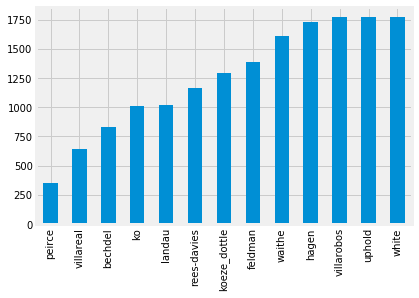

In [37]:
#what are the easiest tests to 'pass'
cast_scores.sum(numeric_only=True).sort_values(ascending=True).plot(kind='bar')

In [39]:
#we can also use a pandas function call 'groupby' to drill further into the data. 
#here we're grouping all rows by the movie title, then summing all values in the score columns together. 
cast_scores.groupby('movie').sum()

,bechdel,peirce,landau,feldman,villareal,hagen,ko,villarobos,waithe,koeze_dottle,uphold,white,rees-davies
movie,,,,,,,,,,,,,
10 Cloverfield Lane,0,0,10,10,0,10,10,10,10,10,10,10,10
Alice Through the Looking Glass,0,0,23,0,23,23,23,23,23,23,23,23,0
Arrival,0,0,60,0,0,60,60,60,60,0,60,60,60
Bad Moms,0,0,0,16,0,0,0,16,0,0,16,16,16
Batman v Superman: Dawn of Justice,122,0,122,122,0,122,122,122,122,122,122,122,0
Captain America: Civil War,0,0,26,26,26,26,26,26,26,26,26,26,0
Central Intelligence,25,0,25,25,25,25,0,25,0,25,25,25,25
Deadpool,34,34,34,34,34,34,34,34,34,0,34,34,34
Doctor Strange,29,29,29,29,29,29,29,29,29,29,29,29,0


In [40]:
#we can also group by one column and then count values in another column
#so now we can look at the number of men and women per film
cast_scores.groupby('movie').gender.value_counts().sort_values(ascending=False)

movie                                             gender 
Batman v Superman: Dawn of Justice                Male       78
Hacksaw Ridge                                     Male       76
X-Men: Apocalypse                                 Male       61
Hidden Figures                                    Male       55
The Legend of Tarzan                              Male       43
The Magnificent Seven                             Male       40
Fantastic Beasts and Where to Find Them           Male       40
The Accountant                                    Male       37
Batman v Superman: Dawn of Justice                Female     36
Suicide Squad                                     Male       35
Sully                                             Male       34
Hidden Figures                                    Female     32
Ride Along 2                                      Male       30
Ghostbusters                                      Male       30
Arrival                                       

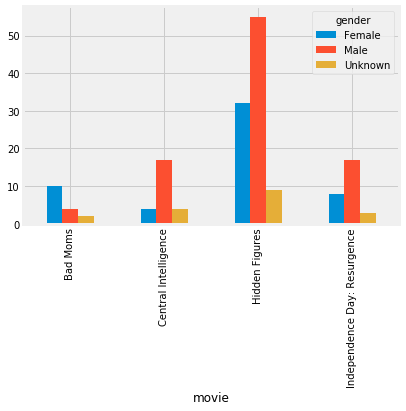

In [41]:
#you can also filter a dataframe first, then apply a groupby to it
cast_scores[cast_scores.waithe==0].groupby('movie').gender.value_counts().sort_values(ascending=False).unstack().plot(kind='bar')

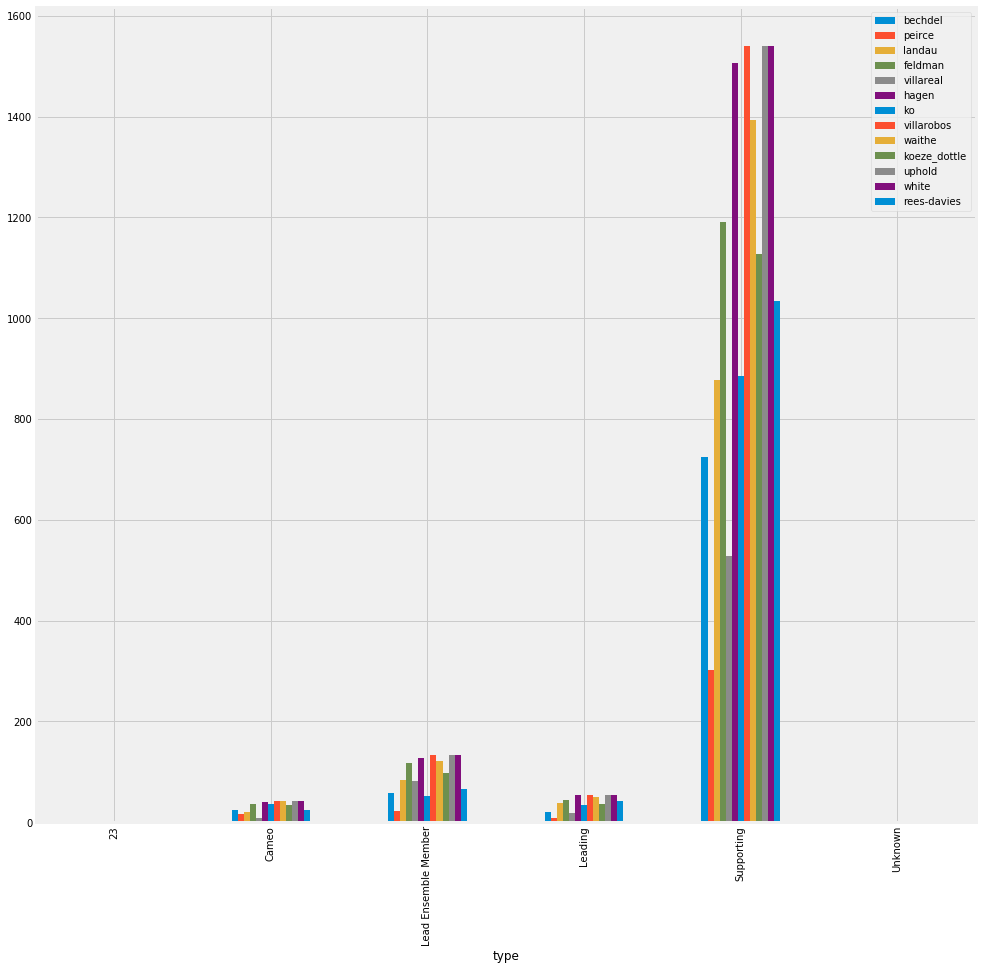

In [36]:
#this particular line of code groups all rows with similar types of roles together, then sums those values up
#so all the '1's for supporting roles that passed the bechdel test would be added together.
cast_scores.groupby('type').sum().plot(kind='bar', figsize=(15,15))

#### Generate a hypothesis

- This is not the next step as much as it is an iterative process
- Define a hypothesis, test it, then come back and re-evaluate that hypothesis

![torres](files/torres2.PNG)

#### Create and run a model

[There's a workshop about this in the afternoon!](https://github.com/akornilo/ML_Demos/blob/master/movie_sentiment/Movie%20Review%20Notebook.ipynb)

![facebook](files/fb.PNG)

#### Evaluate the model

- What kind of evaluation metric should you use?
- Is your evaluation metric meaningful?
- Is your model better than random guessing?

![compas](files/compas.PNG)

#### Communicate your findings

- Can you explain your process to the people affected by its decisions?

![gdpr](files/gdpr.PNG)

# Questions?

![](https://image.slidesharecdn.com/jsm2016-160804155728/95/data-science-as-a-science-32-638.jpg?cb=1470326843)